# Car Make and Model Recognizer
I shall explore here my tries to reach a good optimizer

## Importing Libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from glob import glob

Using TensorFlow backend.


## Pre-Processing

### Data Augmentation

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.25,
                                   rotation_range = 90,
                                   horizontal_flip=True,
                                  validation_split = 0.3)
#test_datagen = ImageDataGenerator(rescale=1./255,
 #                                horizontal_flip = True)

train_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')
test_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                            subset='validation',
                                            shuffle=True)

Found 5796 images belonging to 196 classes.
Found 2348 images belonging to 196 classes.


## Model

In [3]:
model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(filters=8, kernel_size=4, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=16, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=32, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal',padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(GlobalAveragePooling2D())
model.add(Dense(196, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 8)       392       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 16)      528       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 32)        2080      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        8256      
__________

### Train

In [5]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 50

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='Saved_Models/weights.best.from_scratch30.hdf5', 
                               verbose=1, save_best_only=True)

Saving = model.fit_generator(train_data,
          steps_per_epoch=185,  
          epochs=epochs,
          verbose=1, 
          validation_data=test_data,
          validation_steps=150,
          callbacks=[checkpointer])
# model.fit(train_data, test_data,
#                   callbacks = [checkpointer],
#                   validation_split = 0.33,
#                   epochs=epochs,
#           batch_size = 20,
#           verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
185/185 [==============================] - 149s 806ms/step - loss: 5.2799 - acc: 0.0047 - val_loss: 5.2772 - val_acc: 0.0084

Epoch 00001: val_loss improved from inf to 5.27722, saving model to Saved_Models/weights.best.from_scratch30.hdf5
Epoch 2/50
185/185 [==============================] - 142s 767ms/step - loss: 5.2781 - acc: 0.0083 - val_loss: 5.2763 - val_acc: 0.0086

Epoch 00002: val_loss improved from 5.27722 to 5.27631, saving model to Saved_Models/weights.best.from_scratch30.hdf5
Epoch 3/50
185/185 [==============================] - 142s 767ms/step - loss: 5.2775 - acc: 0.0086 - val_loss: 5.2757 - val_acc: 0.0086

Epoch 00003: val_loss improved from 5.27631 to 5.27566, saving model to Saved_Models/weights.best.from_scratch30.hdf5
Epoch 4/50
185/185 [==============================] - 141s 762ms/step - loss: 5.2770 - acc: 0.0074 - val_loss: 5.2751 - val_acc: 0.0088

Epoch 00004: val_loss improved from 5.27566 to 5.27513

185/185 [==============================] - 141s 764ms/step - loss: 5.2740 - acc: 0.0088 - val_loss: 5.2726 - val_acc: 0.0086

Epoch 00039: val_loss did not improve from 5.27099
Epoch 40/50
185/185 [==============================] - 141s 762ms/step - loss: 5.2744 - acc: 0.0074 - val_loss: 5.2723 - val_acc: 0.0082

Epoch 00040: val_loss did not improve from 5.27099
Epoch 41/50
185/185 [==============================] - 141s 765ms/step - loss: 5.2735 - acc: 0.0086 - val_loss: 5.2733 - val_acc: 0.0092

Epoch 00041: val_loss did not improve from 5.27099
Epoch 42/50
185/185 [==============================] - 141s 761ms/step - loss: 5.2754 - acc: 0.0084 - val_loss: 5.2732 - val_acc: 0.0080

Epoch 00042: val_loss did not improve from 5.27099
Epoch 43/50
185/185 [==============================] - 141s 764ms/step - loss: 5.2736 - acc: 0.0076 - val_loss: 5.2717 - val_acc: 0.0090

Epoch 00043: val_loss did not improve from 5.27099
Epoch 44/50
185/185 [==============================] - 141s 762ms/s

In [6]:

vals = pd.DataFrame.from_dict(Saving.history)
vals = pd.concat([pd.Series(range(0,100),name='epochs'),vals],axis=1)
vals.head(n=31)

,epochs,val_loss,val_acc,loss,acc
0,0,5.277216,0.008403,5.279944,0.004752
1,1,5.276311,0.008613,5.278130,0.008316
2,2,5.275657,0.008613,5.277562,0.008656
3,3,5.275135,0.008824,5.277043,0.007468
4,4,5.274154,0.007563,5.276060,0.008486
5,5,5.274038,0.009034,5.275993,0.008147
6,6,5.273707,0.008403,5.275461,0.008486
7,7,5.273287,0.008824,5.275301,0.008826
8,8,5.273033,0.008613,5.275299,0.007468
9,9,5.274112,0.008193,5.275255,0.008486


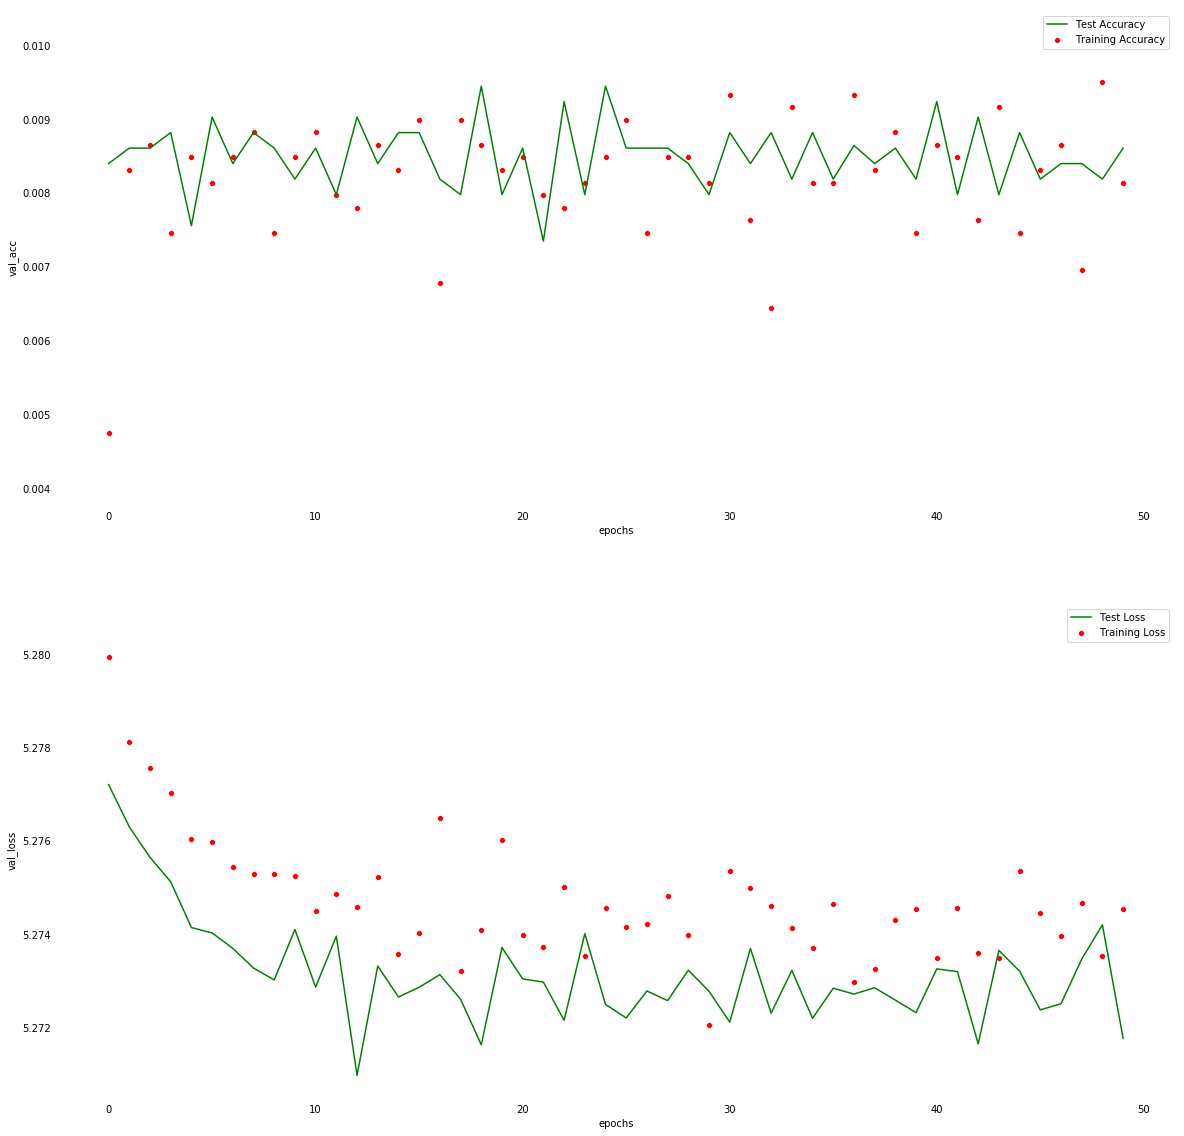

In [7]:
import seaborn as sns
sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

ig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
# for i in range(n_iterations):
#         print('\r{}/{}'. format(i, n_iterations))
#         #initilaize random hyperparameters
#         random_parameters = {K: random.sample(V, 1)[0] for K, V in parameters_grid.items()}
#         #create model with random hyperparameters
#         model = create_model(random_parameters)
#         opt = create_RMSprop_optimizer(random_parameters)
#         #compile model
#         model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
#         #train model
#         epochs = 40
#         checkpointer = ModelCheckpoint(filepath='saved_models/model_weights.hdf5', verbose=1, save_best_only=True)
#         early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)
#         history = model.fit(X_train, Y_train,
#                   callbacks = [checkpointer, early_stopping],
#                   validation_split = 0.33,
#                   epochs=epochs, batch_size = 20, verbose=1)
#         #compare current min validation loss with global min validation loss
#         current_min_val_loss = np.min(history.history['val_loss'])
#         if(current_min_val_loss < global_min_val_loss):
#             global_min_val_loss = current_min_val_loss
#             #save the best model so far
#             model.load_weights('saved_models/model_weights.hdf5')
#             model.save('saved_models/best_model.h5')
#             print('saving new best model, val_loss = {}'.format(current_min_val_loss))
#             #save best hyperparameters
#             best_hyperparameters = random_parameters